In [19]:
#Import bilbiotek
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns
pd.set_option('display.max_columns', None)

In [20]:
#Załadowanie zbioru danych
df = pd.read_csv("EPL_2017-2021.csv")
df['Date'] = pd.to_datetime(df['Date'])

In [21]:
df

,Date,Time,Round,Day,Venue,Result,Opponent,Season,Team,Result_rolling,GF_rolling,GA_rolling,Poss_rolling,Attendance_rolling,Sh_rolling,SoT_rolling,Dist_rolling,FK_rolling,PK_rolling,PKatt_rolling,SoTA_rolling,PKA_rolling,PKsv_rolling,PKm_rolling,Cmp_Total_rolling,Att_Total_rolling,TotDist_rolling,PrgDist_rolling,TI_rolling,CK_rolling,SCA_rolling,GCA_rolling,Tkl_Defensive_rolling,TklW_Defensive_rolling,Blocks_Defensive_rolling,Touches_rolling,Def Pen_rolling,Def 3rd_rolling,Mid 3rd_rolling,Att 3rd_rolling,Dribbles_Succ_rolling,Dribles_Att_rolling,Rec_rolling,CrdY_rolling,CrdR_rolling,2CrdY_rolling,Fls_rolling,Fld_rolling,Off_rolling,PKwon_rolling,PKcon_rolling,OG_rolling
0,2017-09-25,20,6,1,0,2,25,2017,0,1.0,1.4,1.6,60.6,48558.4,16.2,5.4,17.50,0.2,0.0,0.0,4.6,0.0,0.0,0.0,526.2,644.6,8902.2,3081.6,20.2,6.4,30.2,2.4,17.2,13.2,7.2,747.0,54.0,192.2,360.6,201.2,11.0,15.2,522.8,1.4,0.0,0.0,11.6,8.6,3.8,0.0,0.0,0.0
1,2017-10-01,12,7,7,0,2,4,2017,0,1.0,1.0,1.0,60.8,48507.8,13.8,4.4,17.38,0.8,0.2,0.2,4.4,0.0,0.0,0.0,526.2,640.4,8894.8,3118.8,19.8,6.0,25.4,1.4,15.6,11.6,7.0,741.2,54.0,185.8,361.6,200.4,10.4,15.2,522.8,1.6,0.0,0.0,11.4,9.6,2.8,0.2,0.0,0.0
2,2017-10-14,17,8,6,1,0,24,2017,0,1.4,1.4,0.8,58.4,54491.6,15.2,4.8,17.44,1.2,0.2,0.2,3.8,0.0,0.0,0.0,518.6,630.2,8672.8,2997.0,19.0,5.4,27.2,2.0,15.6,11.6,8.0,734.6,57.8,184.6,353.2,202.8,9.2,13.8,516.0,1.6,0.0,0.0,10.6,10.2,2.6,0.2,0.0,0.0
3,2017-10-22,13,9,7,1,2,9,2017,0,1.4,1.6,0.4,58.8,47927.2,15.4,6.0,18.24,1.2,0.2,0.2,2.2,0.2,0.0,0.0,518.4,631.8,8820.4,3048.0,18.4,5.8,27.4,2.2,16.6,11.8,9.0,736.8,57.8,189.0,347.6,205.4,7.8,11.6,515.0,0.8,0.0,0.0,10.8,10.6,1.6,0.2,0.2,0.0
4,2017-10-28,15,10,6,0,2,22,2017,0,1.4,2.0,0.8,60.6,43912.6,18.0,7.0,18.44,1.4,0.2,0.2,2.4,0.2,0.0,0.0,529.4,639.6,8944.6,3106.8,19.2,5.2,31.2,3.2,15.8,11.2,9.8,744.4,55.6,193.8,349.4,205.8,8.4,11.8,525.8,1.0,0.0,0.0,10.8,11.6,1.0,0.2,0.2,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3655,2022-04-30,15,34,6,0,0,4,2021,27,0.8,1.0,1.2,56.0,34675.2,10.8,4.2,18.96,0.0,0.0,0.0,4.2,0.4,0.0,0.0,452.8,552.8,8124.6,2679.2,20.2,3.2,19.0,1.6,20.4,11.2,10.6,655.6,64.6,230.6,304.0,127.0,10.4,20.2,447.6,2.0,0.2,0.2,11.8,9.2,0.8,0.0,0.4,0.0
3656,2022-05-07,15,35,6,1,1,7,2021,27,0.4,0.8,1.8,53.6,33101.4,10.2,3.8,18.38,0.2,0.0,0.0,5.6,0.6,0.0,0.2,423.4,526.6,7495.4,2532.8,20.6,4.2,17.2,1.2,21.8,12.2,11.6,625.8,66.8,236.2,278.0,117.6,11.2,21.6,418.2,2.2,0.2,0.2,10.8,7.6,1.0,0.0,0.8,0.0
3657,2022-05-11,20,36,3,0,0,15,2021,27,0.6,0.8,1.6,52.2,33171.0,10.2,3.0,17.32,0.2,0.0,0.0,5.8,0.8,0.0,0.2,408.6,510.4,7092.2,2428.2,19.0,4.4,16.4,1.4,22.4,12.6,10.4,611.2,70.2,235.2,270.8,111.2,11.0,19.0,403.4,2.2,0.0,0.0,10.4,6.2,1.0,0.0,1.0,0.0
3658,2022-05-15,14,37,7,0,1,18,2021,27,0.2,0.6,2.4,49.2,33368.6,9.4,2.8,17.70,0.2,0.0,0.0,5.8,0.6,0.0,0.2,404.4,502.6,7065.4,2395.0,16.6,4.8,15.8,1.4,21.0,12.2,9.4,599.4,71.0,233.4,266.2,104.8,11.0,19.4,399.6,1.4,0.0,0.0,7.8,6.4,1.2,0.0,0.8,0.0


In [22]:
X = df.drop(columns=['Result', 'Date'], axis=1)
#X = df.drop(columns=['Result', 'Date', 'Round', 'Season', 'Opponent', 'Team', 'Time', 'Day', 'Venue'], axis=1)
y = df['Result']
zmienne = ['Result_rolling','GF_rolling','GA_rolling','Poss_rolling','Attendance_rolling','Sh_rolling','SoT_rolling','Dist_rolling','FK_rolling','PK_rolling','PKatt_rolling',	'SoTA_rolling',	'PKA_rolling',	'PKsv_rolling',	'PKm_rolling',	'Cmp_Total_rolling',	'Att_Total_rolling',	'TotDist_rolling',	'PrgDist_rolling',	'TI_rolling','CK_rolling','SCA_rolling','GCA_rolling','Tkl_Defensive_rolling','TklW_Defensive_rolling',	'Blocks_Defensive_rolling',	'Touches_rolling',	'Def Pen_rolling',	'Def 3rd_rolling','Mid 3rd_rolling','Att 3rd_rolling','Dribbles_Succ_rolling','Dribles_Att_rolling','Rec_rolling','CrdY_rolling','CrdR_rolling','2CrdY_rolling','Fls_rolling','Fld_rolling','Off_rolling','PKwon_rolling','PKcon_rolling','OG_rolling']
#Normalizacja danych
#scale = MinMaxScaler()
#scale = StandardScaler()
#scale.fit(X[zmienne])
#scale.transform(X[zmienne])
#df_scaled = pd.DataFrame(scale.transform(X[zmienne]), columns = zmienne)
#X = pd.concat([X.drop(zmienne, axis = 1), df_scaled], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
X
#X


,Time,Round,Day,Venue,Opponent,Season,Team,Result_rolling,GF_rolling,GA_rolling,Poss_rolling,Attendance_rolling,Sh_rolling,SoT_rolling,Dist_rolling,FK_rolling,PK_rolling,PKatt_rolling,SoTA_rolling,PKA_rolling,PKsv_rolling,PKm_rolling,Cmp_Total_rolling,Att_Total_rolling,TotDist_rolling,PrgDist_rolling,TI_rolling,CK_rolling,SCA_rolling,GCA_rolling,Tkl_Defensive_rolling,TklW_Defensive_rolling,Blocks_Defensive_rolling,Touches_rolling,Def Pen_rolling,Def 3rd_rolling,Mid 3rd_rolling,Att 3rd_rolling,Dribbles_Succ_rolling,Dribles_Att_rolling,Rec_rolling,CrdY_rolling,CrdR_rolling,2CrdY_rolling,Fls_rolling,Fld_rolling,Off_rolling,PKwon_rolling,PKcon_rolling,OG_rolling
0,20,6,1,0,25,2017,0,1.0,1.4,1.6,60.6,48558.4,16.2,5.4,17.50,0.2,0.0,0.0,4.6,0.0,0.0,0.0,526.2,644.6,8902.2,3081.6,20.2,6.4,30.2,2.4,17.2,13.2,7.2,747.0,54.0,192.2,360.6,201.2,11.0,15.2,522.8,1.4,0.0,0.0,11.6,8.6,3.8,0.0,0.0,0.0
1,12,7,7,0,4,2017,0,1.0,1.0,1.0,60.8,48507.8,13.8,4.4,17.38,0.8,0.2,0.2,4.4,0.0,0.0,0.0,526.2,640.4,8894.8,3118.8,19.8,6.0,25.4,1.4,15.6,11.6,7.0,741.2,54.0,185.8,361.6,200.4,10.4,15.2,522.8,1.6,0.0,0.0,11.4,9.6,2.8,0.2,0.0,0.0
2,17,8,6,1,24,2017,0,1.4,1.4,0.8,58.4,54491.6,15.2,4.8,17.44,1.2,0.2,0.2,3.8,0.0,0.0,0.0,518.6,630.2,8672.8,2997.0,19.0,5.4,27.2,2.0,15.6,11.6,8.0,734.6,57.8,184.6,353.2,202.8,9.2,13.8,516.0,1.6,0.0,0.0,10.6,10.2,2.6,0.2,0.0,0.0
3,13,9,7,1,9,2017,0,1.4,1.6,0.4,58.8,47927.2,15.4,6.0,18.24,1.2,0.2,0.2,2.2,0.2,0.0,0.0,518.4,631.8,8820.4,3048.0,18.4,5.8,27.4,2.2,16.6,11.8,9.0,736.8,57.8,189.0,347.6,205.4,7.8,11.6,515.0,0.8,0.0,0.0,10.8,10.6,1.6,0.2,0.2,0.0
4,15,10,6,0,22,2017,0,1.4,2.0,0.8,60.6,43912.6,18.0,7.0,18.44,1.4,0.2,0.2,2.4,0.2,0.0,0.0,529.4,639.6,8944.6,3106.8,19.2,5.2,31.2,3.2,15.8,11.2,9.8,744.4,55.6,193.8,349.4,205.8,8.4,11.8,525.8,1.0,0.0,0.0,10.8,11.6,1.0,0.2,0.2,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3655,15,34,6,0,4,2021,27,0.8,1.0,1.2,56.0,34675.2,10.8,4.2,18.96,0.0,0.0,0.0,4.2,0.4,0.0,0.0,452.8,552.8,8124.6,2679.2,20.2,3.2,19.0,1.6,20.4,11.2,10.6,655.6,64.6,230.6,304.0,127.0,10.4,20.2,447.6,2.0,0.2,0.2,11.8,9.2,0.8,0.0,0.4,0.0
3656,15,35,6,1,7,2021,27,0.4,0.8,1.8,53.6,33101.4,10.2,3.8,18.38,0.2,0.0,0.0,5.6,0.6,0.0,0.2,423.4,526.6,7495.4,2532.8,20.6,4.2,17.2,1.2,21.8,12.2,11.6,625.8,66.8,236.2,278.0,117.6,11.2,21.6,418.2,2.2,0.2,0.2,10.8,7.6,1.0,0.0,0.8,0.0
3657,20,36,3,0,15,2021,27,0.6,0.8,1.6,52.2,33171.0,10.2,3.0,17.32,0.2,0.0,0.0,5.8,0.8,0.0,0.2,408.6,510.4,7092.2,2428.2,19.0,4.4,16.4,1.4,22.4,12.6,10.4,611.2,70.2,235.2,270.8,111.2,11.0,19.0,403.4,2.2,0.0,0.0,10.4,6.2,1.0,0.0,1.0,0.0
3658,14,37,7,0,18,2021,27,0.2,0.6,2.4,49.2,33368.6,9.4,2.8,17.70,0.2,0.0,0.0,5.8,0.6,0.0,0.2,404.4,502.6,7065.4,2395.0,16.6,4.8,15.8,1.4,21.0,12.2,9.4,599.4,71.0,233.4,266.2,104.8,11.0,19.4,399.6,1.4,0.0,0.0,7.8,6.4,1.2,0.0,0.8,0.0


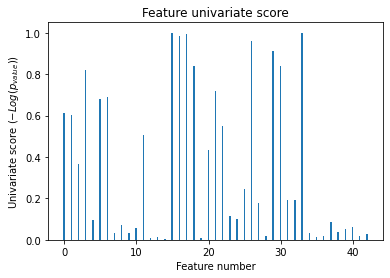

In [23]:
#Anova dla numerical Input

from sklearn.feature_selection import SelectKBest, f_classif

X_Anova = df.drop(columns=['Result', 'Date', 'Round', 'Season', 'Opponent', 'Team', 'Time', 'Day', 'Venue'], axis=1)
y = df['Result']
X_train_anova, X_test_anova, y_train_anova, y_test_anova = train_test_split(X_Anova, y, test_size=0.15, random_state=42)
selector = SelectKBest(f_classif, k=15)
selector.fit(X_train_anova, y_train)
scores = -np.log10(selector.pvalues_)
scores /= scores.max()
import matplotlib.pyplot as plt

X_indices = np.arange(X_Anova.shape[-1])
plt.figure(1)
plt.clf()
plt.bar(X_indices - 0.05, scores, width=0.2)
plt.title("Feature univariate score")
plt.xlabel("Feature number")
plt.ylabel(r"Univariate score ($-Log(p_{value})$)")
plt.show()

Feature 0: 13.145867
Feature 1: 0.000667
Feature 2: 3.297975
Feature 3: 3.218842
Feature 4: 0.648591
Feature 5: 1.773585
Feature 6: 23.238566


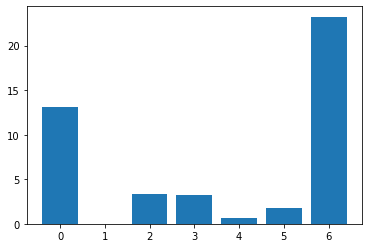

In [24]:

# Chi squared Kategoryczne
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from matplotlib import pyplot
 

 
# prepare input data
def prepare_inputs(X_train, X_test):
 oe = OrdinalEncoder()
 oe.fit(X_train)
 X_train_enc = oe.transform(X_train)
 X_test_enc = oe.transform(X_test)
 return X_train_enc, X_test_enc
 
 
# feature selection
def select_features(X_train, y_train, X_test):
 fs = SelectKBest(score_func=chi2, k='all')
 fs.fit(X_train, y_train)
 X_train_fs = fs.transform(X_train)
 X_test_fs = fs.transform(X_test)
 return X_train_fs, X_test_fs, fs
 

X_Chi = df[['Round', 'Season', 'Opponent', 'Team', 'Time', 'Day', 'Venue']]
y = df['Result']
# split into train and test sets
X_train_Chi, X_test_Chi, y_train, y_test = train_test_split(X_Chi, y, test_size=0.15, random_state=1)


# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train_Chi, y_train, X_test_Chi)
# what are scores for the features
for i in range(len(fs.scores_)):
 print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

[0.0229367  0.02386008 0.02200944 0.01898859 0.02557909 0.01777784
 0.02059408 0.02169456 0.02147366 0.02319429 0.02057235 0.02243097
 0.02275139 0.02234565 0.02321566 0.02180904 0.01374616 0.01465708
 0.02305774 0.01432379 0.00762637 0.00365973 0.01939387 0.01925356
 0.01953256 0.02220553 0.0230438  0.02377684 0.02195586 0.0217677
 0.02396023 0.0228509  0.0232838  0.01995715 0.02260212 0.02257898
 0.02096016 0.02185908 0.02371595 0.0228517  0.01980588 0.02239772
 0.01349187 0.00824904 0.02396673 0.02300529 0.023048   0.01359941
 0.01527657 0.01330543]


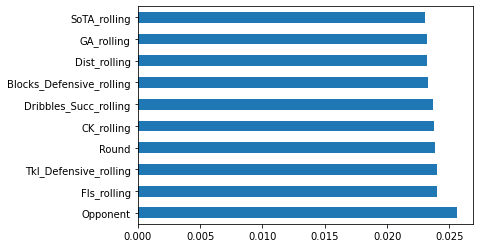

In [25]:
#Feature importance ExtraTreesClassifier
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X_train,y_train)
print(model.feature_importances_) 
#plot 
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

[0.01785522 0.02093427 0.01960154 0.01830454 0.01823062 0.01840636
 0.0186901  0.01936088 0.0183028  0.01899058 0.02013203 0.02123734
 0.01874363 0.0199513  0.02149043 0.01963911 0.01713451 0.01933138
 0.0181054  0.02338048 0.02053165 0.01134295 0.02187234 0.01853539
 0.02124022 0.02241424 0.02039251 0.02095927 0.02241976 0.02011574
 0.01880708 0.02063461 0.02052815 0.02261892 0.02284778 0.01931902
 0.02204544 0.01989817 0.02208142 0.01991342 0.02283558 0.01928804
 0.0154873  0.01920428 0.01976618 0.01913398 0.01968973 0.02191127
 0.02443072 0.02191233]


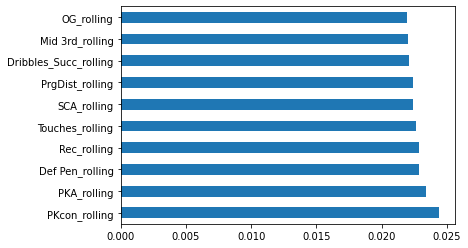

In [26]:
from xgboost import XGBClassifier
from matplotlib import pyplot
model = XGBClassifier()
model.fit(X_train, y_train)
# feature importance
print(model.feature_importances_)
# plot
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [27]:
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot
model = RandomForestClassifier()
# fit the model
model.fit(X_train, y_train)
importance = model.feature_importances_
print(model.feature_importances_)
# plot
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
#feat_importances.nlargest(10).plot(kind='barh')
plt.show()

[0.01552904 0.02728168 0.01244478 0.00532581 0.02662061 0.00955591
 0.01668295 0.01588335 0.01643975 0.01833832 0.02521675 0.02788696
 0.0242435  0.02331203 0.03287687 0.01477316 0.00616519 0.00739731
 0.02434792 0.00610592 0.00276432 0.00149596 0.02455107 0.02433461
 0.02571415 0.03003412 0.02913376 0.02566547 0.0282296  0.02255072
 0.02758893 0.02770782 0.02916367 0.02374318 0.03048398 0.0311178
 0.0266017  0.02915336 0.02653116 0.02885164 0.02393101 0.0206312
 0.00544177 0.00305587 0.02819527 0.02707404 0.02241716 0.00628813
 0.00688108 0.00423965]


In [28]:
from sklearn.datasets import make_regression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
fs = SelectKBest(score_func=f_regression, k=10)
# apply feature selection
X_selected = fs.fit_transform(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.15, random_state=42)
df = pd.DataFrame(X_selected)
df



,0,1,2,3,4,5,6,7,8,9
0,60.6,5.4,526.2,644.6,8902.2,3081.6,747.0,360.6,201.2,522.8
1,60.8,4.4,526.2,640.4,8894.8,3118.8,741.2,361.6,200.4,522.8
2,58.4,4.8,518.6,630.2,8672.8,2997.0,734.6,353.2,202.8,516.0
3,58.8,6.0,518.4,631.8,8820.4,3048.0,736.8,347.6,205.4,515.0
4,60.6,7.0,529.4,639.6,8944.6,3106.8,744.4,349.4,205.8,525.8
...,...,...,...,...,...,...,...,...,...,...
3655,56.0,4.2,452.8,552.8,8124.6,2679.2,655.6,304.0,127.0,447.6
3656,53.6,3.8,423.4,526.6,7495.4,2532.8,625.8,278.0,117.6,418.2
3657,52.2,3.0,408.6,510.4,7092.2,2428.2,611.2,270.8,111.2,403.4
3658,49.2,2.8,404.4,502.6,7065.4,2395.0,599.4,266.2,104.8,399.6


In [29]:
from sklearn.ensemble import RandomForestClassifier
classifier_1 = RandomForestClassifier(n_estimators=50, min_samples_split=10, random_state=1)
classifier_1.fit(X_train, y_train)
preds = classifier_1.predict(X_test)
accuracy_score(y_test, classifier_1.predict(X_test))



0.4663023679417122

In [30]:
comparison = pd.DataFrame(dict(actual=y_test, predicted=preds))
comparison

,actual,predicted
291,1,0
270,2,0
149,0,1
1188,0,0
2037,2,2
...,...,...
1650,2,0
88,1,2
718,2,0
2605,1,0


In [31]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
fs = SelectKBest(score_func=f_classif, k=2)
X_selected = fs.fit_transform(X, y)

In [32]:
from functools import partial
from sklearn.feature_selection import mutual_info_classif, SelectKBest
discrete_feat_idx = [0, 6] # an array with indices of discrete features
score_func = partial(mutual_info_classif, discrete_features=discrete_feat_idx)
s = SelectKBest(score_func)
X_selected = s.fit_transform(X,y)
X_table = pd.DataFrame(X_selected)
X_table

,0,1,2,3,4,5,6,7,8,9
0,25.0,0.0,16.2,526.2,644.6,8902.2,3081.6,747.0,360.6,522.8
1,4.0,0.0,13.8,526.2,640.4,8894.8,3118.8,741.2,361.6,522.8
2,24.0,0.0,15.2,518.6,630.2,8672.8,2997.0,734.6,353.2,516.0
3,9.0,0.0,15.4,518.4,631.8,8820.4,3048.0,736.8,347.6,515.0
4,22.0,0.0,18.0,529.4,639.6,8944.6,3106.8,744.4,349.4,525.8
...,...,...,...,...,...,...,...,...,...,...
3655,4.0,27.0,10.8,452.8,552.8,8124.6,2679.2,655.6,304.0,447.6
3656,7.0,27.0,10.2,423.4,526.6,7495.4,2532.8,625.8,278.0,418.2
3657,15.0,27.0,10.2,408.6,510.4,7092.2,2428.2,611.2,270.8,403.4
3658,18.0,27.0,9.4,404.4,502.6,7065.4,2395.0,599.4,266.2,399.6


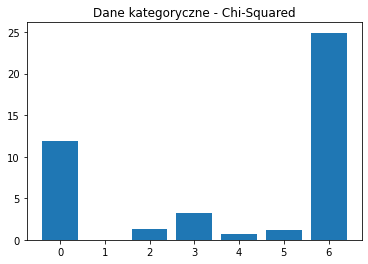

,Value
Venue,24.914839
Round,11.862887
Team,3.254032
Opponent,1.299294
Day,1.236098
Time,0.659264


In [34]:
#Kategoryczne dane chi2
df = pd.read_csv("EPL_2017-2021.csv")
df['Date'] = pd.to_datetime(df['Date'])
X_Chi = df[['Round', 'Season', 'Opponent', 'Team', 'Time', 'Day', 'Venue']]
y = df['Result']
X_train_Chi, X_test_Chi, y_train, y_test = train_test_split(X_Chi, y, test_size=0.1, random_state=1)
fs = SelectKBest(score_func=chi2, k='all')
fs.fit(X_train_Chi, y_train)
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.title("Dane kategoryczne - Chi-Squared")
plt.show()
#new_df = pd.DataFrame(X_Chi.columns, fs.scores_)
#new_df
new_df = pd.DataFrame(fs.scores_)
new_df_1 = pd.DataFrame.transpose(new_df)
new_df_1.columns= X_Chi.columns
new_df_2 = pd.DataFrame.transpose(new_df_1)
new_df_2.columns = ['Value']
new_df_2.sort_values('Value', ascending = False, inplace = True)
new_df_2.head(6)



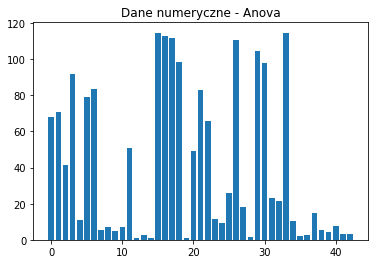

,Value
Rec_rolling,114.606131
Cmp_Total_rolling,114.561183
Att_Total_rolling,112.781353
TotDist_rolling,111.870327
Touches_rolling,110.617065
Mid 3rd_rolling,104.320283
PrgDist_rolling,98.227418
Att 3rd_rolling,97.882520
Poss_rolling,91.761110
SoT_rolling,83.404894


In [35]:
#Dane numeryczne anova
df = pd.read_csv("EPL_2017-2021.csv")
df['Date'] = pd.to_datetime(df['Date'])
X_Anova = df.drop(columns=['Result', 'Date', 'Round', 'Season', 'Opponent', 'Team', 'Time', 'Day', 'Venue'], axis=1)
y = df['Result']
X_train_anova, X_test_anova, y_train, y_test = train_test_split(X_Anova, y, test_size=0.1, random_state=1)
fs = SelectKBest(f_classif, k='all')
fs.fit(X_train_anova, y_train)
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.title("Dane numeryczne - Anova")
pyplot.show()
new_df = pd.DataFrame(X_Anova.columns, fs.scores_)
new_df = pd.DataFrame(fs.scores_)
new_df_1 = pd.DataFrame.transpose(new_df)
new_df_1.columns= X_Anova.columns
new_df_2 = pd.DataFrame.transpose(new_df_1)
new_df_2.columns = ['Value']
new_df_2.sort_values('Value', ascending = False, inplace = True)
new_df_2.head(10)

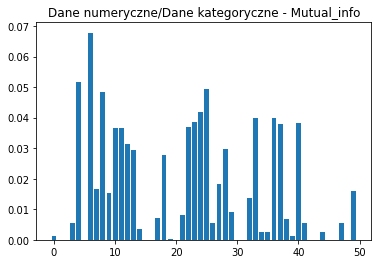

,Value
Team,0.067816
Opponent,0.051734
PrgDist_rolling,0.049403
GF_rolling,0.048303
TotDist_rolling,0.041855
Mid 3rd_rolling,0.039993
Touches_rolling,0.039972
Att_Total_rolling,0.038711
Rec_rolling,0.038325
Att 3rd_rolling,0.037871


In [36]:
from functools import partial
from sklearn.feature_selection import mutual_info_classif, SelectKBest
df = pd.read_csv("EPL_2017-2021.csv")
df['Date'] = pd.to_datetime(df['Date'])
X = df.drop(columns=['Result', 'Date'], axis=1)
y = df['Result']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
score_func = partial(mutual_info_classif, discrete_features=[0, 6])
fs = SelectKBest(score_func, k=10)
fs.fit(X_train, y_train)
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.title("Dane numeryczne/Dane kategoryczne - Mutual_info")
pyplot.show()

new_df = pd.DataFrame(fs.scores_)
new_df_1 = pd.DataFrame.transpose(new_df)
new_df_1.columns= X.columns
new_df_2 = pd.DataFrame.transpose(new_df_1)
new_df_2.columns = ['Value']
new_df_2.sort_values('Value', ascending = False, inplace = True)
new_df_2.head(10)
